### `Super-Kamiokande PreSN using SNEWPY`

In this notebook, graphs from a research paper on Super-K sensitivity to pre-supernova neutrinos are being reproduced. The purpose of which is to test the accuracy of using pre-supernova models in SNEWPY.


*"Pre-supernova Alert System for Super-Kamiokande" L. N. Machado et al 2022*

DOI 10.3847/1538-4357/ac7f9c

-------

### #1 Fig. 1 Number Pre-SN IBD interactions in the last 10 h

*Description of figure*: Number of Pre-SN inverse beta decay interactions in the last 10 h, 15 solar masses at a distance of 150 pc away from earth. The graph shows both Odrzywolek and Patton models as well as normal mass ordering and inverted mass ordering for each model.

In [11]:
#Copied from usage notebook
from astropy import units as u
import matplotlib.pyplot as plt
from snewpy.models import presn, ccsn
import numpy as np

from snewpy import snowglobes

SNOwGLoBES_path = None  # to use custom SNOwGLoBES detector/channel/smearing files, set SNOwGLoBES directory
SNEWPY_models_base = "../../models/"  # directory containing SNEWPY models

In [12]:
#Set general parameters
distance = 0.15
detector = "wc100kt30prct"
modeltype_O = 'Odrzywolek_2010'
modeltype_P = 'Patton_2017'

# set desired flavor transformation
transformation = 'NoTransformation'
transformation_INV = 'NoTransformation'

# 10 hours before collapse
tstart = -36000 * u.s
tend = 0.8 * u.s

In [13]:
#Odrzywolek 15 solar masses
model = 's15_nuebar_data'
modelfile = SNEWPY_models_base + "presn-models/" + modeltype_O + "/" + model + '.txt'

#Normal mass
outfile_O = modeltype_O+"_"+model+"_"+transformation

#Inverted mass
outfile_O_INV = modeltype_O +"_"+model+"_"+transformation_INV

In [14]:
#Patton 15 solar masses normal mass
model_P = 'totalLuminosity_15SolarMass'
modelfile_P = SNEWPY_models_base + "presn-models/" + modeltype_P + "/" + model_P + '.dat'

#Normal mass
outfile_P = modeltype_P +"_"+model_P+"_"+transformation

#Inverted mass
outfile_P_INV = modeltype_P +"_"+model_P+"_"+transformation_INV

In [15]:
#Generate Patton normal
print("Preparing fluences ...")
tarredfile_P = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation, distance, outfile_P, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_P, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_P = snowglobes.collate(SNOwGLoBES_path, tarredfile_P, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [16]:
#Generate Patton inverted
print("Preparing fluences ...")
tarredfile_P_INV = snowglobes.generate_fluence(modelfile_P, modeltype_P, transformation_INV, distance, outfile_P_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_P_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_P_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_P_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [17]:
#Generate Odrzywolek normal
print("Preparing fluences ...")
tarredfile = snowglobes.generate_fluence(modelfile, modeltype_O, transformation, distance, outfile_O, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables = snowglobes.collate(SNOwGLoBES_path, tarredfile, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [18]:
#Generate Odrzywolek inverted
print("Preparing fluences ...")
tarredfile_INV = snowglobes.generate_fluence(modelfile, modeltype_O, transformation_INV, distance, outfile_O_INV, tstart, tend)

# Next, we run SNOwGLoBES. This will loop over all the fluence files in `tarredfile`.
print("Running SNOwGLoBES ...")
snowglobes.simulate(SNOwGLoBES_path, tarredfile_INV, detector_input=detector)

# Finally, we collate SNOwGLoBES’ results into a dictionary
print("Collating results ...")
tables_INV = snowglobes.collate(SNOwGLoBES_path, tarredfile_INV, skip_plots=True)

Preparing fluences ...
Running SNOwGLoBES ...
Using snowglobes_data module ...
Collating results ...


In [19]:
#Find keys
print(list(tables_INV.keys()))

['wc100kt30prct', 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_wc100kt30prct_events_smeared_weighted.dat', 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_wc100kt30prct_events_unsmeared_weighted.dat']


In [20]:
#KEYS
key_O = 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_wc100kt30prct_events_unsmeared_weighted.dat'
key_O_INV = 'Collated_Odrzywolek_2010_s15_nuebar_data_NoTransformation_wc100kt30prct_events_unsmeared_weighted.dat'
key_P = 'Collated_Patton_2017_totalLuminosity_15SolarMass_NoTransformation_wc100kt30prct_events_unsmeared_weighted.dat'
key_P_INV = 'Collated_Patton_2017_totalLuminosity_15SolarMass_NoTransformation_wc100kt30prct_events_unsmeared_weighted.dat'

In [21]:

print(f"Energy bins (in MeV):\n{tables[key_O]['data'][0][:12]}")

for i, channel in enumerate(tables[key_O]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables[key_O]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[   0.            0.            0.          672.31375503 1304.40871558
 1274.93439477  924.29734714  567.38933186  314.94433374  162.5776704
   79.73511129   38.17142323]
Number of nue_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nuebar_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nc events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of e events in those energy bins:
[ 400.83762873 2036.32328167 3070.3167185  2720.64539073 1813.79089636
 1022.13346946  513.81773844  241.61667663  107.49967078   46.64025463
   19.66076088    8.24223879]


In [22]:

print(f"Energy bins (in MeV):\n{tables_P[key_P]['data'][0][:12]}")

for i, channel in enumerate(tables_P[key_P]['header'].split()[1:]):

    print(f"Number of {channel} events in those energy bins:\n{tables_P[key_P]['data'][i+1][:12]}")

Energy bins (in MeV):
[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]
Number of ibd events in those energy bins:
[   0.            0.            0.          753.39095476 1570.93647151
 1544.57700006 1092.6311865   695.86146473  383.39701478  178.83317332
   81.17932363   38.40689542]
Number of nue_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nuebar_O16 events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of nc events in those energy bins:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of e events in those energy bins:
[ 297.46059356 1969.55262765 3582.7574596  3812.59016311 3002.75950368
 1967.98053423 1193.33144327  694.4508567   378.1941987   194.81936631
   99.23456443   51.00785563]


Text(0, 0.5, 'Number of IBD events per MeV in 22.5kt water')

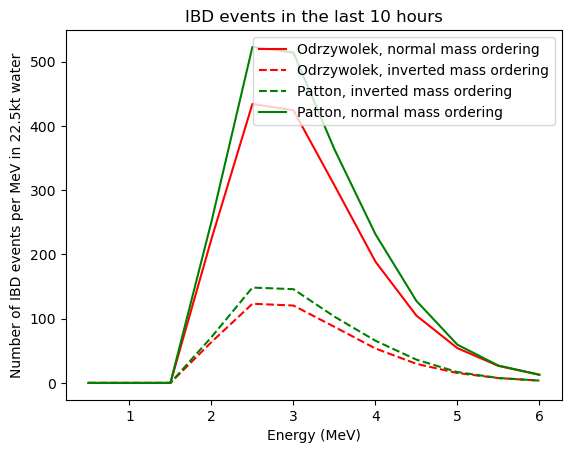

In [23]:
#ODRZYWOLEK NORMAL
table_O = tables[key_O]['data']

energy_bins_O = table_O[0][:12] 
ibd_channel_idx = None
for idx, channel in enumerate(tables[key_O]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx = idx + 1
        break

events_ibd_O = table_O[ibd_channel_idx][:12]
events_SK_O = np.array(events_ibd_O) * 0.225 * 2 * 0.74 #*0.225 becaue of detector size, *2 because we're using 0.5MeV bins rather than 1 MeV

#ODRZYWOLEK INVERTED
table_O_INV = tables_INV[key_O_INV]['data']

energy_bins_O_INV = table_O_INV[0][:12] 
ibd_channel_idx_INV = None
for idx, channel in enumerate(tables_INV[key_O_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_INV = idx + 1
        break

events_ibd_O_INV = table_O_INV[ibd_channel_idx_INV][:12]
events_SK_O_INV = np.array(events_ibd_O_INV) * 0.225 * 2 * 0.21

#PATTON INVERTED
table_P_INV = tables_P_INV[key_P_INV]['data']

energy_bins_INV = table_P_INV[0][:12] 
ibd_channel_idx_P_INV = None
for idx, channel in enumerate(tables_P_INV[key_P_INV]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_P_INV = idx + 1
        break

events_ibd_P_INV = table_P_INV[ibd_channel_idx_P_INV][:12]
events_SK_P_INV = np.array(events_ibd_P_INV)* 0.225 * 2 * 0.21

#PATTON NORMAL
table_P = tables_P[key_P]['data']

energy_bins_P = table_P[0][:12] 
ibd_channel_idx_P = None
for idx, channel in enumerate(tables_P[key_P]['header'].split()[1:]):
    if channel == 'ibd':
        ibd_channel_idx_P = idx + 1
        break

events_ibd_P = table_P[ibd_channel_idx_P][:12]
events_SK_P = np.array(events_ibd_P) * 0.225 * 2 * 0.74

plt.title('IBD events in the last 10 hours')
plt.plot(energy_bins_O, events_SK_O, color='red', label = 'Odrzywolek, normal mass ordering')
plt.plot(energy_bins_O, events_SK_O_INV, color='red', linestyle='dashed',label = 'Odrzywolek, inverted mass ordering')
plt.plot(energy_bins_O, events_SK_P_INV, color='green', linestyle='dashed',label = 'Patton, inverted mass ordering')
plt.plot(energy_bins_O, events_SK_P, color='green',label = 'Patton, normal mass ordering')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of IBD events per MeV in 22.5kt water')